# **P**rincipal **C**omponent **A**nalysis (dt. Hauptkomponentenanalyse)

The code is based on a video digression by Leonid Grau from the Linear Algebra Module in WiSe 2021/22 at KIT. Credits to him.

Iris flower data set: R. A. Fisher ([CSV on GitHub](https://gist.github.com/netj/8836201))


## Code

Import modules

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Import data

In [2]:
iris = pd.read_csv("iris.csv")

iris_data = iris[
    [
        "sepal.length",
        "sepal.width",
        "petal.length",
        "petal.width"
    ]
].values

np.around(iris.describe(), decimals=2)

,sepal.length,sepal.width,petal.length,petal.width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


Standardize data

In [3]:
iris_data_normalized = StandardScaler().fit_transform(iris_data)
varieties = iris.variety.tolist() # extract labels

Run PCA

In [4]:
pca = PCA(n_components=4)
iris_pca = pca.fit_transform(iris_data_normalized)

### Output

Console ouput

In [5]:
print("Covariance matrix:\n", np.around(np.array(pca.get_covariance()), decimals=3))
print("Components:\n", np.around(np.array(pca.components_), decimals=2))
print("Explained variance (diagonal entries):\n", pca.explained_variance_)
print("Explained variance ratio (adds up to 1):\n", pca.explained_variance_ratio_)


Covariance matrix:
 [[ 1.007 -0.118  0.878  0.823]
 [-0.118  1.007 -0.431 -0.369]
 [ 0.878 -0.431  1.007  0.969]
 [ 0.823 -0.369  0.969  1.007]]
Components:
 [[ 0.52 -0.27  0.58  0.56]
 [ 0.38  0.92  0.02  0.07]
 [-0.72  0.24  0.14  0.63]
 [-0.26  0.12  0.8  -0.52]]
Explained variance (diagonal entries):
 [2.93808505 0.9201649  0.14774182 0.02085386]
Explained variance ratio (adds up to 1):
 [0.72962445 0.22850762 0.03668922 0.00517871]


Scatter Plot


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

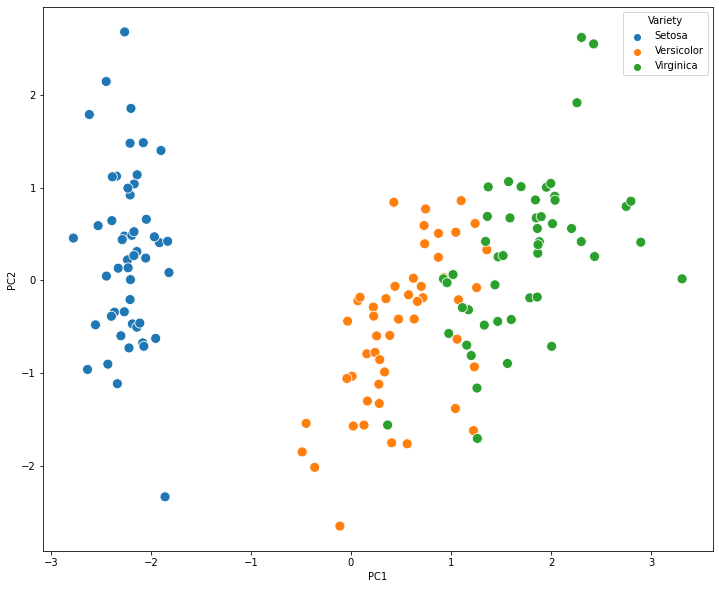

In [6]:
# prepare DataFrame
pc_df = pd.DataFrame(data=iris_pca, columns=["PC1", "PC2", "PC3", "PC4"])
pc_df["Variety"] = varieties

# plot
plt.figure(figsize=(12, 10))
iris_plot = sns.scatterplot(x="PC1", y="PC2", data=pc_df, hue="Variety", s=100)
iris_plot

> From here on you need to have `plotly` installed

Plot scatter matrix to see clusters in the various principal components

In [7]:
import plotly.express as px

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    iris_pca,
    labels=labels,
    dimensions=range(4),
    color=pc_df["Variety"]
)

fig.update_traces(diagonal_visible=False)

fig

Plot 'em in 3D! (the 3 best principal components)

In [8]:
fig = px.scatter_3d(
    iris_pca, x=0, y=1, z=2, color=pc_df['Variety'],
    title=f'Total Explained Variance: {pca.explained_variance_ratio_.sum() * 100:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)

fig